<img src="Header Curso 2.png" width="921" height="89" align="center"/>

<h1><center>Modelos predictivos con Machine Learning - AnáhuacX</center></h1>
<h2><center>Actividad 1: Predicción de costos en el seguro médico</center></h2>


En el siguiente ejercicio practicarás algunos de los comandos vistos durante la semana y crearás un modelo predictivo. Después de terminar tu practica responderás un formulario donde autoevaluaras tu desarrollo. <strong>Al finalizar deberás subir tu cuaderno en un archivo .zip</strong>. Es muy importante que subas tu cuaderno de la manera en cómo te indicamos.

En esta actividad responderás la pregunta: 
¿Es posible predecir la prima del seguro de pacientes según sus características? Para responderla deberás seguir los pasos a detalle.


<h3><center>Instrucciones</center></h3>

1. Descargar y descomprime la base de datos <a href="https://courses.edx.org/asset-v1:AnahuacX+UVA-CP1-1x+2T2020+type@asset+block@insurance_clean.zip">insurance_clean.zip</a> (El archivo extraído debe de colocarse en la misma carpeta que el este cuaderno). Abre el archivo con el paquete pandas. después imprime en pantalla los primeros 5 registros/filas.

In [54]:
import pandas as pd
df = pd.read_csv("./insurance_clean.csv", index_col=0)
df_ = df
df.head()

,age,bmi,children,charges
1,18,33.77,1,1725.5523
2,28,33.00,3,4449.4620
4,32,28.88,0,3866.8552
5,31,25.74,0,3756.6216
6,46,33.44,1,8240.5896


2. __¿Cuál es el quinto registro del conjunto de datos?__

3. Tenemos un problema.  La primera columna la interpretó como variable y no como índice.

<table>
    <thead>
    <tr bgcolor="darkorange">
        <th style="text-align:center;"></th>
        <th style="text-align:center;">Unnamed: 0</th>
        <th style="text-align:center;">age</th>
        <th style="text-align:center;">bmi</th>
        <th style="text-align:center;">children</th>
        <th style="text-align:center;">charges</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td style="text-align:center;">0</td>
        <td style="text-align:center;">1</td>    
        <td style="text-align:center;">18</td>    
        <td style="text-align:center;">33.77</td>    
        <td style="text-align:center;">1</td>    
        <td style="text-align:center;">1725.5523</td>    
    </tr>
    <tr>
        <td style="text-align:center;">⋮</td>
        <td style="text-align:center;">⋮</td>    
        <td style="text-align:center;">⋮</td>    
        <td style="text-align:center;">⋮</td>    
        <td style="text-align:center;">⋮</td>    
        <td style="text-align:center;">⋮</td>    
    </tr>
    </tbody>
</table>

Vuelve a leer el archivo con pandas pero ahora usa el parametro _index_col=0_ para indicar que la columna número cero es el índice. Imprime los  últimos 5 registros del nuevo DataFrame (recuerda guardarlo como variable _df_).



In [56]:
df.tail(5)

,age,bmi,children,charges
1326,42,32.87,0,7050.0213
1327,51,30.03,1,9377.9047
1334,18,31.92,0,2205.9808
1335,18,36.85,0,1629.8335
1336,21,25.80,0,2007.9450


4. __¿Cuál es el último registro del conjunto de datos?__

5. Ahora podemos analizar nuestros datos.

Las variables de estudio son:

<table>
    <thead>
    <tr bgcolor="darkorange">
        <th style="text-align:center;">Nombre de variable</th><th style="text-align:center;">Descripción</th>
    </tr>
    </thead>
    <tbody>
    <tr>
        <td style="text-align:center;">Age</td><td style="text-align:center;">Edad del asegurado.</td>    
    </tr>
    <tr>
        <td style="text-align:center;">BMI</td><td style="text-align:center;">Índice de masa corporal del asegurado.</td>    
    </tr>
    <tr>
        <td style="text-align:center;">Children</td><td style="text-align:center;">Número de hijos que dependen del asegurado.</td>
    </tr>
    <tr>
        <td style="text-align:center;">Charges</td><td style="text-align:center;">Variable a predecir. Cantidad asegurada en dólares.</td>
    </tr>
    </tbody>
</table>

Haras una predición con la columna __age__ como variable predictiva y __charges__ como variable de respuesta. Separa el conjunto de datos _df_ en las variables X,Y. En otras palabras, asigna la columna __age__ a X y asigna la columna __charges__ a Y.

Imprime los primeros 5 valores de las variables X,Y. 

[[22.8  ]
 [16.815]
 [34.58 ]
 [34.4  ]
 [26.41 ]
 [33.7  ]
 [27.74 ]
 [26.41 ]
 [27.36 ]
 [19.95 ]
 [31.46 ]
 [43.89 ]
 [26.6  ]
 [28.9  ]
 [23.87 ]
 [38.9  ]
 [27.17 ]
 [27.93 ]
 [20.35 ]
 [20.8  ]]


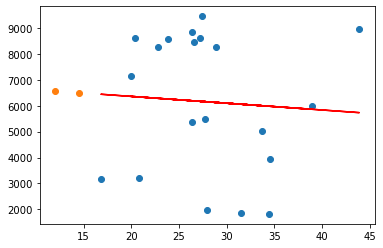

In [70]:
from sklearn.linear_model import LinearRegression
import numpy as  np
import matplotlib.pyplot as plt
# df = df.sample(10, random_state=100)

X = df["bmi"].values.reshape(-1,1)
y = df["charges"].values.reshape(-1, 1)

reg = LinearRegression().fit(X,y)
y_hat = reg.predict(X)
# print(y_hat)

plt.scatter(X, y)
plt.plot(X, y_hat,"r-")

test_points_X = [[12.00],[14.50]]
test_points_y = reg.predict(test_points_X)

plt.scatter(test_points_X,test_points_y)

test_points_y

print(X)

# df.head()




6. __¿Cuáles son los primeros 5 valores de X y Y?__

7. Tenemos que separar los datos en conjuntos de entrenamiento y prueba.
Utiliza el método __train_test_split__ del paquete __sklearn.model_selection__ para separar en __X_train,X_test,y_train y y_test__.

Utiliza el parámetro _random_state=1_ para garantizar la reproducibilidad y _test_size=0.2_ para definir una separación del 80/20.

Imprime los primeros 5 valores de X_test y y_test.


In [71]:
df=df_.sample(20, random_state=1) #recuperando el dataset original
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)
print("df:", df.shape)
print("X:", X.shape)
print("X train:", X_train.shape)
print("X test:", X_test.shape)

df: (20, 4)
X: (20, 1)
X train: (16, 1)
X test: (4, 1)


8. __¿Cuál es el índice de los primeros 5 elementos del conjunto de pruebas?__

9. Construye y entrena una regresión lineal usando "LinearRegresion" de la librería sklearn.linear_model, utiliza para el entrenamiento las variables X_train y y_train.
Después, calcula la métrica de error $R^2$ (_r2_score_). Este cálculo hazlo con el conjunto de entrenamiento y prueba. Imprime el error obtenido.


interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

<function __main__.plot(degree=1)>

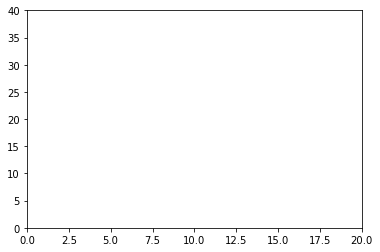

In [72]:
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
#func
def plot(degree = 1):
    poly = PolynomialFeatures(degree=degree)
    poly.fit_transform(X_train)

    reg = LinearRegression().fit(poly.transform(X_train),y_train)

    plt.scatter(X_train,y_train)
    plt.scatter(X_test,y_test)

    y_train_hat = reg.predict(poly.transform(X_train))
    y_test_hat = reg.predict(poly.transform(X_test))

    x_model = np.linspace(0,20).reshape((-1,1))
    y_model = reg.predict(poly.transform(x_model))
    plt.plot(x_model,y_model, "r--")
    plt.axis([0, 20, 0, 40])

    print("R2 train:",r2_score(y_train,y_train_hat))
    print("R2 test:",r2_score(y_test,y_test_hat))
    
    plt.show()

interact(plot,degree=(1,10))

10. __¿De cuánto es el error calculado con la métrica R2 para el conjunto de entrenamiento y validación?__

11. Ahora intentemos mejorar el modelo. Cambiemos la variable age por BMI. Repite los pasos 3,4 y 5 para con BMI como variable X.
Imprime los nuevos resultados.


12. __¿De cuánto es el error calculado con la métrica R2 para el conjunto de entrenamiento y validación?__

13. __¿Cuál modelo es mejor? Aquel con la edad como variable o el que utiliza BMI como variable.__

14. Según nuestro estudio, __¿qué variable es más relevante para nuestro modelo?__

15. Guarda tu libreta y colócala en una carpeta comprimida con extensión __.zip__. Sube el archivo __.zip__ a la __plataforma de EdX__ y califica los ejercicios de tus demás compañeros.

<img src="Anáhuac_edX.png" width="498" height="150" align="center"/>